# Results Visualization

Visualize the results is very important for understanding and analysing model's performance. We defined some handy functions for the purpose of results visualization.

In [1]:
import sys
sys.path.append(r'/home/lab/Documents/bohao/code/mrs')

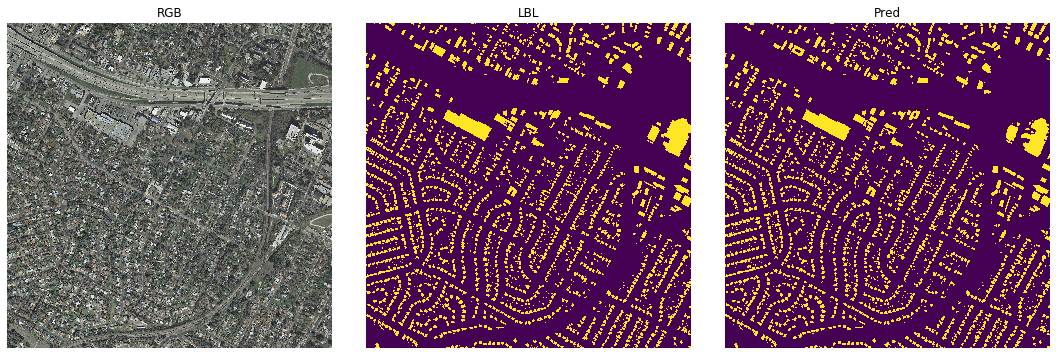

In [2]:
%matplotlib inline
import numpy as np
from mrs_utils import misc_utils, vis_utils

rgb_file = r'/media/ei-edl01/data/remote_sensing_data/inria/images/austin1.tif'
lbl_file = r'/media/ei-edl01/data/remote_sensing_data/inria/gt/austin1.tif'
conf_file = r'/hdd/Results/mrs/inria/ecresnet50_dcunet_dsinria_lre1e-04_lrd1e-04_ep50_bs7_ds50_dr0p1/austin1.npy'
rgb = misc_utils.load_file(rgb_file)
lbl_img, pred_img = misc_utils.load_file(lbl_file)/255, (misc_utils.load_file(conf_file) > 0.5).astype(np.int)
vis_utils.compare_figures([rgb, lbl_img, pred_img], (1, 3), fig_size=(15, 5), title_list=('RGB', 'LBL', 'Pred'))

To have a better visualization of the predictions, one option is to overlay the prediction on top of the label map to have a direct comparison. We defined several functions in [vis_utils.py](../mrs_utils/vis_utils.py) to handle this.

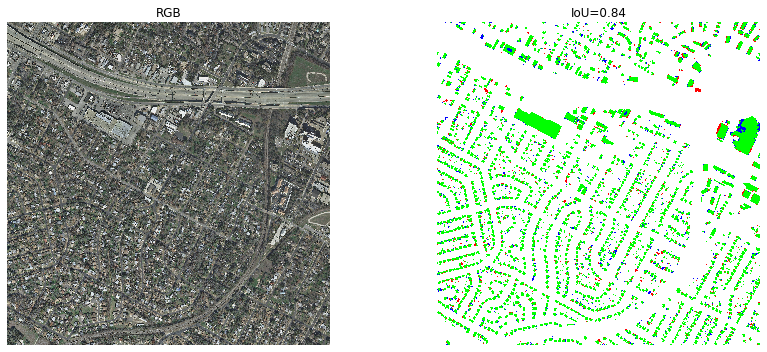

In [3]:
from mrs_utils import metric_utils
cmp_mask = vis_utils.make_cmp_mask(lbl_img, pred_img)
iou = metric_utils.iou_metric(lbl_img, pred_img, divide=True)
vis_utils.compare_figures([rgb, cmp_mask], (1, 2), fig_size=(12, 5), title_list=('RGB', 'IoU={:.2f}'.format(iou)))

Zooming in:

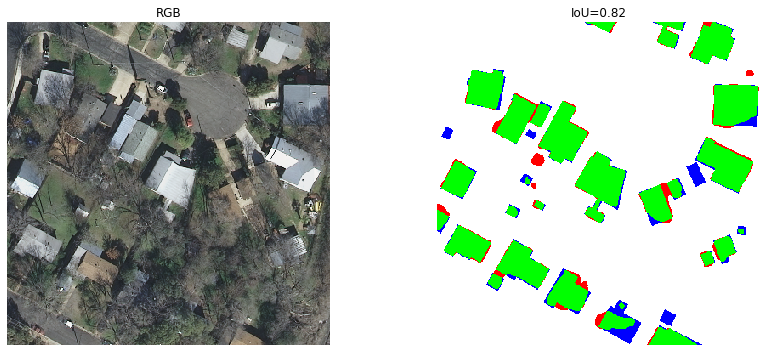

In [4]:
rgb = rgb[3090:3470, 3540:3920, :]
lbl_img, pred_img = lbl_img[3090:3470, 3540:3920], pred_img[3090:3470, 3540:3920]
cmp_mask = vis_utils.make_cmp_mask(lbl_img, pred_img)
iou = metric_utils.iou_metric(lbl_img, pred_img, divide=True)
vis_utils.compare_figures([rgb, cmp_mask], (1, 2), fig_size=(12, 5), title_list=('RGB', 'IoU={:.2f}'.format(iou)))